In [2]:
import numpy as np
import matplotlib.pyplot as plt
from animator import animate_Clusters
from DataSetGen import generate_cluster_data
from ReinforcementClustering import reinforcement_clustering

In [4]:
# Example synthetic data

N = 100 # number of nodes
K = 10 # number of clusters
P = 0.1 # cluster varience

X = generate_cluster_data(N, K, P, random_seed=1)

beta_min = 0.0001
beta_max = 10000.0
tau = 1.5


pi_star_list, Y_list = reinforcement_clustering(
    beta_min, beta_max, tau, K, X, episodes=2000
)
Y_final = Y_list[-1]
pi_star = pi_star_list[-1]


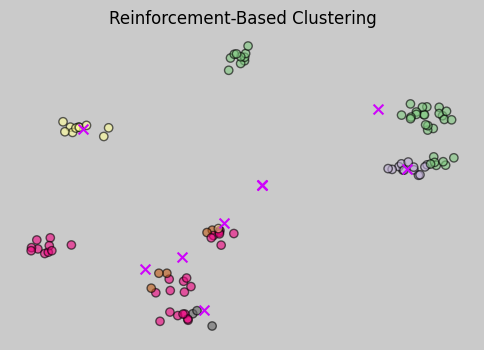

In [5]:
plt.figure(figsize=(6, 4), facecolor="#CACACA", edgecolor="#000000")
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=pi_star,
    cmap="Accent",
    marker="o",
    edgecolors="black",
    alpha=0.6,
    label="Data points",
)
plt.scatter(
    Y_final[:, 0], Y_final[:, 1], c="#ce04fb", marker="x", s=50, label="Centroids"
)
plt.title("Reinforcement-Based Clustering")
plt.axis("off")
plt.show()

In [6]:
animate_Clusters(X, Y_list, pi_star_list, interval=200)